# Laboratorium 2


### Konfiguracja

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll
import matplotlib.colors as mcolors
from matplotlib.widgets import Button
import json as js

class _Button_callback(object):
    def __init__(self, scenes):
        self.i = 0
        self.scenes = scenes

    def set_axis(self, ax):
        self.ax = ax
        
    def next(self, event):
        self.i = (self.i + 1) % len(scenes)
        self.draw()

    def prev(self, event):
        self.i = (self.i - 1) % len(scenes)
        self.draw()
        
    def draw(self):
        self.ax.clear()
        for collection in scenes[self.i].points:
            if len(collection.points) > 0:
                self.ax.scatter(*zip(*(np.array(collection.points))), c=collection.color, marker=collection.marker)
        for collection in scenes[self.i].lines:
            self.ax.add_collection(collection.get_collection())
        self.ax.autoscale()
        plt.draw()

### Interfejsy

[Dostępne kolory](https://matplotlib.org/3.1.1/gallery/color/named_colors.html)

[Dostępne znaczniki punktów](https://matplotlib.org/3.1.1/api/markers_api.html#module-matplotlib.markers)

In [2]:
class Scene:
    def __init__(self, points=[], lines=[]):
        self.points=points
        self.lines=lines

class PointsCollection:
    def __init__(self, points = [], color = None, marker = None):
        self.points = np.array(points)
        self.color = color
        self.marker = marker

class LinesCollection:
    def __init__(self, lines = [], color = None):
        self.color = color
        self.lines = lines
        
    def add(self, line):
        self.lines.append(line)
        
    def get_collection(self):
        if self.color:
            return mcoll.LineCollection(self.lines, colors=mcolors.to_rgba(self.color))
        else:
            return mcoll.LineCollection(self.lines)
            


class Plot:
    def __init__(self, scenes = [], json = None):
        if json is None:
            self.scenes = scenes
        else:
            self.scenes = [Scene([PointsCollection(pointsCol) for pointsCol in scene["points"]], 
                                 [LinesCollection(linesCol) for linesCol in scene["lines"]]) 
                           for scene in js.loads(json)]
        
    def __configure_buttons(self, callback):
        plt.subplots_adjust(bottom=0.2)
        axprev = plt.axes([0.6, 0.05, 0.15, 0.075])
        axnext = plt.axes([0.76, 0.05, 0.15, 0.075])
        bnext = Button(axnext, 'Następny')
        bnext.on_clicked(callback.next)
        bprev = Button(axprev, 'Poprzedni')
        bprev.on_clicked(callback.prev)
        return [bprev, bnext]

    def draw(self):
        plt.close()
        callback = _Button_callback(self.scenes)
        self.widgets = self.__configure_buttons(callback)
        callback.set_axis(plt.axes())
        plt.show()
        callback.draw()
        
    def toJSON(self):
        return js.dumps([{"points": [pointCol.points.tolist() for pointCol in scene.points], 
                          "lines":[linesCol.lines for linesCol in scene.lines]} 
                         for scene in self.scenes])
    

### Przykład użycia

In [3]:
%matplotlib notebook

# scenes=[Scene([PointsCollection([(1, 2), (3, 1.5), (2, -1)]), 
#                PointsCollection([(5, -2), (2, 2), (-2, -1)], 'green', marker = "^")], 
#               [LinesCollection([[(1,2),(2,3)], [(0,1),(1,0)]], 'orange')]), 
#         Scene([PointsCollection([(1, 2), (-15, 1.5), (2, -1)], 'red'), 
#                PointsCollection([(5, -2), (2, 2), (-2, 1)], 'black')], 
#               [LinesCollection([[(-1,2),(-2,3)], [(0,-1),(-1,0)]])])]

# plot = Plot(scenes)
# plot.draw() 


### Rozwiązanie

In [4]:
signs = [-1, 1]
import random
def generatePoints(nr, valRange):
    points = []
    for i in range(0, nr):
        point = (random.random()*valRange*random.choice(signs), random.random()*valRange*random.choice(signs))
        points.append(point)
    return points


In [5]:
import math
signs = [-1, 1]

def generateOnCircle(nr, R=1, middle=(0,0)):
    points = []
    for i in range(0, nr):
        t = random.random()
        x = math.cos(math.pi/2*t)*R*random.choice(signs)
        y = math.sin(math.pi/2*t)*R*random.choice(signs)
        x += middle[0]
        y += middle[1]
        points.append((x,y))
    return points


In [6]:
import math
signs = [-1, 1]

def generateOnRect(nr, lowLeft, highRight):
    a = highRight[0]-lowLeft[0]
    b = highRight[1]-lowLeft[1]
    L = 2*(a) + 2*(b)
    points = []
    for i in range(0, nr):
        t = random.random()*L
        if t<=a:  # pierwszy bok
            x = lowLeft[0] + t
            y = lowLeft[1]
        elif t<=a+b:
            x = highRight[0]
            y = lowLeft[1] + t-a
        elif t<2*a+b:
            x = highRight[0]- (t-a-b)
            y = highRight[1]
        else:
            x = lowLeft[0]
            y = highRight[1]-(t-2*a-b)
        
        points.append((x,y))
    return points


In [7]:
import random
import math
def generateOnSquare(lowLeft=(0, 0), highRight=(10,10), ptsOnAxes=25, ptsOnDiag=20):
    a = lowLeft
    b = (lowLeft[0], highRight[1])
    c = highRight
    d = (highRight[0], lowLeft[1])
    points = [a, b, c, d]
    for i in range(ptsOnAxes):
        snd = random.uniform(a[1], c[1])
        points.append((0, snd))
    for i in range(ptsOnAxes):
        snd = random.uniform(a[0], c[0])
        points.append((snd, 0))
    for i in range(ptsOnDiag):
        x = random.uniform(a[0], c[0])
        points.append((x, x))
    for i in range(ptsOnDiag):
        x = random.uniform(a[0], c[0])
        points.append((x, c[1]-a[1]-x))
    return points
        

In [8]:
# 1a)
setA = generatePoints(100, 100)
setB = generateOnCircle(100, 10)
setC = generateOnRect(1000,[-10, -10], [10, 10])
setD = generateOnSquare()

sets = [setA, setB, setC, setD]

<IPython.core.display.Javascript object>


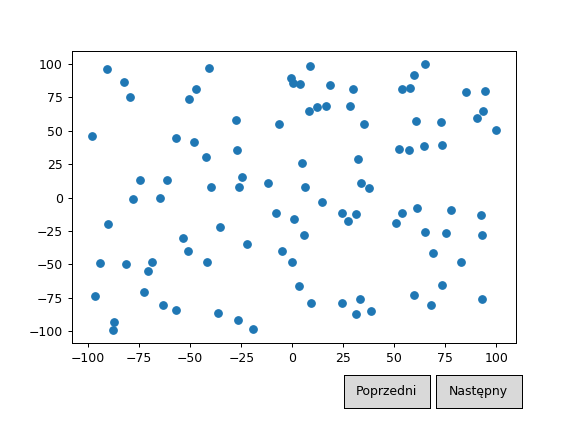

In [9]:
%matplotlib notebook
scenes = []
for setx in sets:
    scenes.append(Scene([PointsCollection(setx)])) 

plot = Plot(scenes)
plot.draw()

In [10]:
""" funkcje pomocnicze """

def orient(a, b, c, eps=1e-12):  # zwraca znak wyznacznika z dokładnością do eps
    matrix = [[a[0], a[1], 1], [b[0], b[1], 1], [c[0], c[1], 1]]
    det = 0
    for j in range(0, 3):
        det += matrix[0][j]*matrix[1][(j+1)%3]*matrix[2][(j+2)%3]
    for j in range(0, 3):
        det -= matrix[2][j]*matrix[1][(j+1)%3]*matrix[0][(j+2)%3]
    if det>eps:
        return 1
    elif det<-eps:
        return -1
    return 0
    
# funkcja porównująca punkty na podstawie ich położenia względem punktu lowest
def cmp (a, b, lowest=(0, 0), eps=1e-10):  
    ans = orient(lowest, a, b, eps)
    return -1*ans

def cmpByY(a, b):
    if(a[1]<b[1]):
        return -1
    if(a[1]>b[1]):
        return 1
    if(a[0]<b[0]):
        return -1
    if(a[0]==b[0]):
        return 0
    return 1


# zwraca najnizszy wzgl y pkt (jeśli y1 == y2 to porównuje x) oraz usuwa go z tablicy wejściowej

def findAndDelLowest(points): 
    if len(points) == 0:
        return None
    lowest = points[0]
    ind = 0
    for idx, point in enumerate(points):
        if cmpByY(point, lowest) == -1:
            lowest = point
            ind = idx
    del points[ind]
    return lowest

# zwraca ten z punktów a, b, który jest dalej położony od refPt
def furtherToRef(a, b, refPt):
    distA = (a[0]-refPt[0])**2 + (a[1]-refPt[1])**2 
    distB = (b[0]-refPt[0])**2 + (b[1]-refPt[1])**2 
    return a if distA>distB else b
    
# zwraca punkt o najmniejszym kącie względem punktu referencyjnego refPt,
# a jeśli katy są te same, to ten położony dalej od refPt
def findMinAndDel(points, refPt, eps):
    if len(points) == 0:
        raise ValueError("points list is empty")
    locMin = points[0]
    locInd = 0
    i = 1
    while i<len(points):
        if cmp(points[i], locMin, refPt, eps) == -1:
            locMin = points[i]
            locInd = i
        if cmp(points[i], locMin, refPt, eps) == 0:
            if(furtherToRef(points[i], locMin, refPt) == points[i]):
                locMin = points[i]
                locInd = i
        i += 1
    del points[locInd]
    return locMin

# print(orient((1, 1),(3, 2),(5, 2)))

In [11]:
""" algorytm grahama """
from functools import cmp_to_key

def graham(points, eps=1e-10):
    lowest = findAndDelLowest(points)
    pts = sorted(points, key=cmp_to_key(lambda x,y: cmp(x, y,lowest, eps)))  # sortowanie tablicy z wyłączeniem punktu najniższego
    points.append(lowest)  # ponowne dodanie najnizszego punktu do tabeli wejściowej
    i = 1
    res = [lowest, pts[0]]
    while i<len(pts):
        if len(res) < 2 or orient(res[-2], res[-1], pts[i]) > 0:
#             print("adding ", pts[i])
            res.append(pts[i])
            i += 1
        else:
#             print("removing ", res[-1])
            del res[-1]          
    return res


# mypts =[(1,2), (0,0), (2, 1),(0, -1) ,(-1, 1), (2, 3), (0, 3)] 
# print(graham(mypts))
# print(mypts)
    


In [12]:
""" algorytm Jarvisa """
from functools import cmp_to_key

def jarvis(points, eps=1e-10):
    if len(points) <= 3:
        return points
    lowest = findAndDelLowest(points)
    ans = [lowest]
    i = findMinAndDel(points, lowest, eps)
    ans.append(i)
    points.append(lowest)  # gdy ten punkt zostanie znowu wylosowany, to znaczy że znaleźliśmy otoczkę
    
    i = findMinAndDel(points, i, eps)
    while i != lowest:
        ans.append(i)
        i = findMinAndDel(points, i, eps)
    return ans

    
# ar = [(2,4),(3,3), (3, 5)]
# print(findMinAndDel(ar, (2,2))  )
# print(ar)


# mypts =[(1,2), (0,0), (2, 1),(0, -1) ,(-1, 1), (2, 3), (0, 3)] 
# print(jarvis(mypts))
# print(mypts)
  

In [13]:
""" prezentacja graficzna gotowych wynikow dzialania algorytmu grahama """
scenes = []

# dodanie zmodyfikowanych zbiorow z cw 1
setA = generatePoints(100, 100)
setB = generateOnCircle(100, 10)
setC = generateOnRect(1000,[-10, -10], [10, 10])
setD = generateOnSquare()
setE = generateOnRect(200, (10, 2), (14, 5))

sets = [setA, setB, setC, setD, setE]

# wyświetlenie działania lgorytmu grahama
for setx in sets:
    setGraham = graham(setx)
    scenes.append(Scene([PointsCollection(setx, color='blue'),
                     PointsCollection(setGraham, color='orange')])) 


Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>


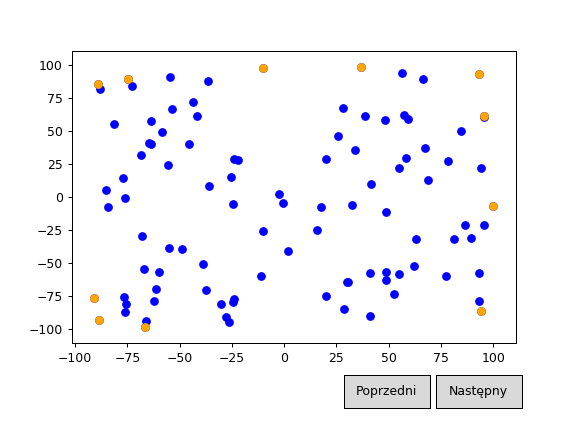

In [14]:
""" prezentacja graficzna wyniku algorytmu Jarvisa """

%matplotlib

# wyświetlenie działania lgorytmu jarvisa
for setx in sets:
    setJarvis = jarvis(setx, 1e-10)
    scenes.append(Scene([PointsCollection(setx, color='blue'),
                     PointsCollection(setJarvis, color='orange')])) 


plot = Plot(scenes)
plot.draw()


<IPython.core.display.Javascript object>


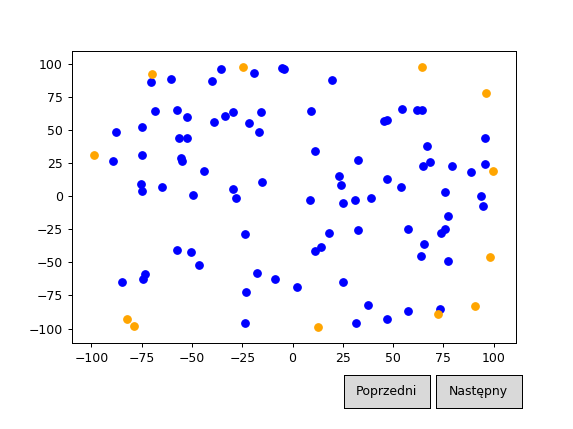

In [15]:
scenes = []

# dodanie zmodyfikowanych zbiorow z cw 1
setA = generatePoints(100, 100)
setB = generateOnCircle(100, 10)
setC = generateOnRect(1000,[-10, -10], [10, 10])
setD = generateOnSquare()
setE = generateOnRect(200, (10, 2), (14, 5))

sets = [setA, setB, setC, setD, setE]

for setx in sets:
    setJarvis = jarvis(setx, 1e-4)
    scenes.append(Scene([PointsCollection(setx, color='blue'),
                     PointsCollection(setJarvis, color='orange')])) 

plot = Plot(scenes)
plot.draw()

In [16]:
""" prezentacja algorytmu Grahama krok po kroku """
from functools import cmp_to_key

def cmp (a, b, lowest=(0, 0)):  
    ans = orient(lowest, a, b)
    return -1*ans

def graham(points):
    lowest = findAndDelLowest(points)
    pts = sorted(points, key=cmp_to_key(lambda x,y: cmp(x, y,lowest)))  # sortowanie tablicy z wyłączeniem punktu najniższego
#     print(pts)
    points.append(lowest)  # ponowne dodanie najnizszego punktu do tabeli wejściowej
    i = 1
    res = [lowest, pts[0]]
    while i<len(pts):
        if len(res) < 2 or orient(res[-2], res[-1], pts[i]) > 0:
#             print("adding ", pts[i])
            res.append(pts[i])
            i += 1
        else:
#             print("removing ", res[-1])
            del res[-1]          
    return res



# mypts =[(1,2), (0,0), (2, 1),(0, -1) ,(-1, 1), (2, 3), (0, 3)] 
# print(graham(mypts))
# print(mypts)
  